In [2]:
import tensorflow as td
from tensorflow import keras
import numpy as np

In [3]:
# Load and process the data sets
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape)

(60000, 28, 28)


In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle Boot"
]

In [6]:
class_names[y_train[0]]

'Coat'

In [7]:
# Build the neural network
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# Model can also be as a list
mode = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [8]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"]
             )

In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 79us/sample - loss: 0.7126 - accuracy: 0.7656 - val_loss: 0.5146 - val_accuracy: 0.8226
Epoch 2/10
55000/55000 [==============================] - 4s 70us/sample - loss: 0.4864 - accuracy: 0.8307 - val_loss: 0.4569 - val_accuracy: 0.8448
Epoch 3/10
55000/55000 [==============================] - 4s 70us/sample - loss: 0.4411 - accuracy: 0.8448 - val_loss: 0.4216 - val_accuracy: 0.8602
Epoch 4/10
55000/55000 [==============================] - 4s 70us/sample - loss: 0.4128 - accuracy: 0.8544 - val_loss: 0.3916 - val_accuracy: 0.8662
Epoch 5/10
55000/55000 [==============================] - 4s 68us/sample - loss: 0.3935 - accuracy: 0.8612 - val_loss: 0.4083 - val_accuracy: 0.8608
Epoch 6/10
55000/55000 [==============================] - 4s 70us/sample - loss: 0.3784 - accuracy: 0.8662 - val_loss: 0.3658 - val_accuracy: 0.8738
Epoch 7/10
55000/55000 [==============================] -

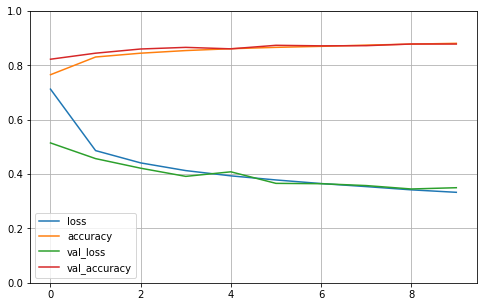

In [10]:
# Plot the training metrics
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
# Evaluate on the test set
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 45us/sample - loss: 71.9757 - accuracy: 0.8277


[71.97572640228272, 0.8277]

In [12]:
# Predict
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)
y_pred = model.predict_classes(X_new)

# Get class names
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [13]:
import os
import time
import tensorflow as tf
from tensorflow import keras

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[tensorboard_cb])

Train on 55000 samples, validate on 10000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 86us/sample - loss: 0.3239 - accuracy: 0.8847 - val_loss: 61.1211 - val_accuracy: 0.8371
Epoch 2/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.3173 - accuracy: 0.8865 - val_loss: 66.6896 - val_accuracy: 0.8338
Epoch 3/30
55000/55000 [==============================] - 5s 90us/sample - loss: 0.3090 - accuracy: 0.8901 - val_loss: 85.4522 - val_accuracy: 0.8151
Epoch 4/30
55000/55000 [==============================] - 5s 93us/sample - loss: 0.3021 - accuracy: 0.8916 - val_loss: 71.1470 - val_accuracy: 0.8306
Epoch 5/30
55000/55000 [==============================] - 5s 92us/sample - loss: 0.2960 - accuracy: 0.8937 - val_loss: 71.6222 - val_accuracy: 0.8241
Epoch 6/30
55000/55000 [==============================] - 5s 87us/sample - loss: 0.2887 - accuracy: 0.8958 - val_loss: 73.6992 - val_accuracy: 0.8239
Epoch 7/30
55000/55000 [==========================

In [18]:
%load_ext tensorboard
%tensorboard --logdir = serve

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 19188.